# WM-811k Wafermap Dataset

## Problem Statement
- **Objective:** To identify different types of wafer map failure patterns automatically instead of manual inspection, which will result in the improvement of wafer fabrication yield.
- **Input:** WM-811K dataset
- **Output:** Failure pattern labels


## Data Visualisation and Preparation

### Data Summary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [3]:
df = pd.read_pickle("data/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


The dataset comprises **811,457 wafer maps**, along with additional information such as **wafer die size**, **lot name**, and **wafer index**.

In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


The data were collected from **47,543 lots** in real world fabrication.

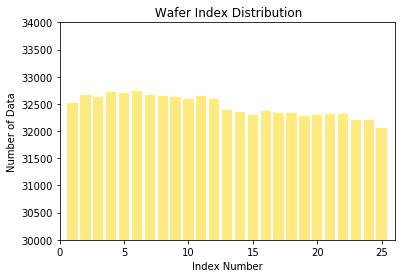

In [6]:
uni_Index = np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" Wafer Index Distribution")
plt.xlabel("Index Number")
plt.ylabel("Number of Data")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

The figure shows that not all lots have perfect 25 wafer maps. It may have been caused by sensor failure or other problems. Probably, we will not need this variable in our classification, so we can drop it from the dataset.

In [7]:
df = df.drop(['waferIndex'], axis = 1)

To check the wafer map dimensions, we create a new variable **'waferMapDim'**

In [8]:
df['waferMapDim']=df.waferMap.apply(lambda x: np.shape(x))
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
500809,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...",710.0,lot31141,[],[],"(32, 29)"
776881,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",935.0,lot46139,[[Test]],[[none]],"(35, 34)"
710100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot43430,[[Training]],[[none]],"(25, 27)"
620237,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot38971,[],[],"(49, 39)"
305176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,lot18614,[],[],"(44, 44)"


In [9]:
print('Largest wafer map shape:', max(df.waferMapDim), '\nSmallest wafer map shape:', min(df.waferMapDim))
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
print('Number of unique wafer map shapes:', uni_waferDim[0].shape[0])

Largest wafer map shape: (300, 202) 
Smallest wafer map shape: (6, 21)
Number of unique wafer map shapes: 632


In [10]:
print(uni_waferDim[0][np.argmax(uni_waferDim[1])])
print(uni_waferDim[1][np.argmax(uni_waferDim[1])])

(32, 29)
108687


**Data transformation** is required to make the input the same dimension.

### Missing Value Check

Since we are only interested in the samples with a failure type, we may remove those without any failure type specified.

In [11]:
tol_wafers = df.shape[0]
print('Total number of wafers:', tol_wafers)

Total number of wafers: 811457


In [12]:
failure_types = []
for f in df.failureType:
    if f.size > 0:
        failure_types.append(f[0][0])
failure_types = set(failure_types)
print('Different failure types:', failure_types)

Different failure types: {'Random', 'none', 'Donut', 'Center', 'Loc', 'Near-full', 'Edge-Ring', 'Scratch', 'Edge-Loc'}


In [13]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

C:\Users\aeali\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\internals\managers.py:1911: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [14]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
print('Samples with labels:', df_withlabel.shape[0])
print('Samples for which the label is a pattern:', df_withpattern.shape[0])
print('Samples for which the label is None:', df_nonpattern.shape[0])

Samples with labels: 172950
Samples for which the label is a pattern: 25519
Samples for which the label is None: 147431


(22, 35)
[['Center']]


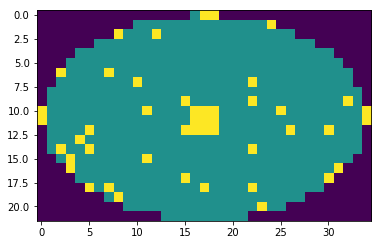

In [25]:
print(np.min(df_withpattern.waferMapDim))
plt.imshow(df_withpattern.waferMap[np.argmin(df_withpattern.waferMapDim)])
print(df_withpattern.failureType[np.argmin(df_withpattern.waferMapDim)])

(212, 84)
[['Loc']]


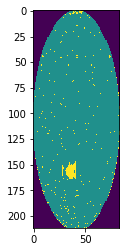

In [26]:
print(np.max(df_withpattern.waferMapDim))
plt.imshow(df_withpattern.waferMap[np.argmax(df_withpattern.waferMapDim)])
print(df_withpattern.failureType[np.argmax(df_withpattern.waferMapDim)])

In [40]:
uni_waferDim_pattern=np.unique(df_withpattern.waferMapDim, return_counts=True)
print('Number of unique wafer map shapes:', uni_waferDim_pattern[0].shape[0])
print('Most frequent shape:', uni_waferDim_pattern[0][np.argmax(uni_waferDim_pattern[1])])
print('Number of samples:', uni_waferDim_pattern[1][np.argmax(uni_waferDim_pattern[1])])
dic = {}
for shape, count in zip(uni_waferDim_pattern[0], uni_waferDim_pattern[1]):
    dic[shape] = count
sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}

Number of unique wafer map shapes: 329
Most frequent shape: (25, 27)
Number of samples: 2900


In [41]:
print(sorted_dic)

{(26, 50): 1, (29, 28): 1, (29, 35): 1, (29, 45): 1, (35, 35): 1, (36, 41): 1, (38, 41): 1, (38, 45): 1, (38, 62): 1, (41, 30): 1, (41, 39): 1, (42, 39): 1, (43, 133): 1, (47, 42): 1, (48, 61): 1, (50, 68): 1, (52, 53): 1, (53, 44): 1, (54, 54): 1, (55, 56): 1, (56, 63): 1, (57, 39): 1, (58, 54): 1, (59, 42): 1, (59, 55): 1, (62, 62): 1, (63, 63): 1, (63, 75): 1, (64, 61): 1, (65, 66): 1, (66, 66): 1, (66, 71): 1, (67, 65): 1, (68, 72): 1, (68, 75): 1, (71, 63): 1, (71, 70): 1, (71, 72): 1, (72, 50): 1, (73, 72): 1, (75, 77): 1, (75, 90): 1, (79, 58): 1, (86, 82): 1, (89, 81): 1, (92, 91): 1, (109, 111): 1, (122, 102): 1, (122, 104): 1, (22, 35): 2, (28, 26): 2, (28, 30): 2, (32, 31): 2, (34, 36): 2, (36, 30): 2, (36, 35): 2, (38, 39): 2, (39, 44): 2, (41, 44): 2, (41, 56): 2, (42, 42): 2, (45, 51): 2, (47, 32): 2, (47, 47): 2, (50, 44): 2, (51, 41): 2, (51, 53): 2, (52, 35): 2, (52, 52): 2, (53, 49): 2, (55, 68): 2, (57, 57): 2, (59, 50): 2, (59, 58): 2, (62, 61): 2, (62, 76): 2, (64,

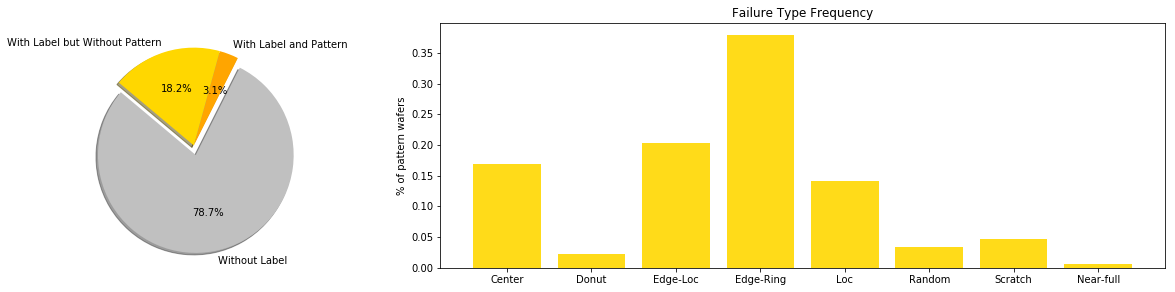

In [27]:
fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['Without Label','With Label and Pattern','With Label but Without Pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("Failure Type Frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

- Only **3.1%** of the wafers **(25,519 wafers)** have real failure patterns.
- The class distribution is highly imbalanced.

In [ ]:
train_test_labels = []
for label in df_withpattern.trianTestLabel:
    train_test_labels.append(label[0][0])
unique_labels = np.unique(train_test_labels, return_counts=True)
for label, count in zip(unique_labels[0], unique_labels[1]):
    print('Number of {} samples:'.format(label), count)

### Data Visualization

First 100 samples with failure patterns:

In [ ]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

First 10 samples for each failure pattern:

In [ ]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for j in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
    for i in range(10):
        ax[i].imshow(img[img.index[i]])
        ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=10)
        ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=10)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

One typical sample for each failure pattern:

In [ ]:
x = [9, 340, 3, 14, 0, 25, 15, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 